# 🚀 **Aygaz Görüntü İşleme Proje Kampı: Hayvan Türleri Sınıflandırması 🐾**

Merhaba! Biz, **Aslı Şemşimoğlu** ve **Rabia Durgut**, Aygaz Görüntü İşleme Proje Kampı kapsamında geliştirdiğimiz **Hayvan Türleri Sınıflandırması** projemizle karşınızdayız. 🎯

----------

### **Kendimizi Tanıtalım**

**🌟 Aslı Şemşimoğlu**  
Afyon Kocatepe Üniversitesi Bilgisayar Mühendisliği 4. sınıf öğrencisiyim. Özellikle doğal dil işleme (NLP) ve makine öğrenimi üzerine projeler geliştiriyorum. Kaggle'da aktif bir kullanıcı olarak veri analitiği projelerine katkı sağlamaktan büyük keyif alıyorum.


**🌟 Rabia Durgut**  
Afyon Kocatepe Üniversitesi Bilgisayar Mühendisliği 4. sınıf öğrencisiyim. Yapay zeka ve makine öğrenimi alanlarında projeler geliştirerek teknik bilgi ve becerilerimi derinleştiriyorum. Özellikle görüntü işleme ve doğal dil işleme (NLP) konularında çalışmaktan keyif alıyorum.

----------

### 🎯 **Proje Amacı ve Kapsamı**

Bu projede,  
✅ Görüntü işleme tekniklerini kullanarak veri hazırlama,  
✅ VGG16 tabanlı **Transfer Learning** yöntemiyle model eğitimi,  
✅ Model performansını artırmak için **Fine-Tuning** ve **Veri Artırma** adımları,  
✅ Test sonuçlarını analiz ederek hayvan sınıflarını başarıyla sınıflandırmak hedeflenmiştir.

Proje boyunca **TensorFlow/Keras** gibi güçlü kütüphaneleri kullandık ve eğitim sürecini optimize etmek için **callback mekanizmalarını** entegre ettik. 🚀

## 🛠️ **Gerekli Kütüphanelerin Yüklenmesi**

Bu bölümde proje boyunca kullanacağımız önemli kütüphaneleri yüklüyoruz. Her biri farklı bir işlevi yerine getiriyor:

-   **`os`, `shutil`, `glob`**: Dosya ve klasör yönetimi için. 📂
-   **`cv2` (OpenCV)**: Görüntü işleme ve yeniden boyutlandırma işlemleri için. 🖼️
-   **`numpy`**: Sayısal hesaplama ve veri manipülasyonu için. 🔢
-   **`ImageDataGenerator`**: Görüntü veri artırma (augmentation) için. 🔄
-   **`train_test_split`**: Veri setini eğitim ve test kümelerine bölmek için. 📊
-   **`VGG16`**: Transfer Learning için önceden eğitilmiş derin öğrenme modeli. 🧠
-   **`Model, Dense, Flatten, Dropout`**: Keras kullanarak model katmanlarını oluşturmak için. 🏗️
-   **`class_weight`**: Dengesiz veri setlerinde sınıf ağırlıklarını ayarlamak için. ⚖️
-   **`EarlyStopping, ReduceLROnPlateau`**: Model eğitimini optimize etmek için geri çağırma mekanizmaları. ⏸️📉
-   **`matplotlib`**: Görselleştirme ve grafik çizimi için. 📈

In [1]:
import os
import shutil
from glob import glob
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

## 📂 **Veri Setinin Hazırlanması: Sınıfların Seçilmesi ve Taşınması** 🐾

Bu adımda, proje kapsamında kullanacağımız **10 hayvan sınıfını** veri setinden seçip yeni bir klasöre taşıyoruz. 🚀

----------

### **📌 Yapılan İşlemler:**

1.  **Ana klasör yolu** belirleniyor:
    
    -   **`source_dir`**: Tüm görüntülerin bulunduğu ana klasör.
2.  **Hedef klasör oluşturuluyor**:
    
    -   Seçilen sınıfların görselleri **`selected_classes`** klasörüne kopyalanıyor.
3.  **Seçilen Sınıflar**:
    
    -   **collie**, **dolphin**, **elephant**, **fox**, **moose**, **rabbit**, **sheep**, **squirrel**, **giant panda** ve **polar bear**. 🐶🐬🐘🦊🦌🐇🐑🐿️🐼🐻‍❄️
4.  **Resim Sayısı**:
    
    -   Her sınıftan **ilk 650 resim** seçiliyor ve taşınıyor.

In [2]:
# Ana klasör yolları
source_dir = '/kaggle/input/dataset/JPEGImages'
destination_dir = 'selected_classes/'

# Kullanılacak sınıflar
selected_classes = ['collie', 'dolphin', 'elephant', 'fox', 'moose', 'rabbit', 'sheep', 'squirrel', 'giant panda', 'polar bear']

# Her sınıftan ilk 650 resmi taşıma
for animal in selected_classes:
    source_path = os.path.join(source_dir, animal)
    dest_path = os.path.join(destination_dir, animal)
    os.makedirs(dest_path, exist_ok=True)
    images = glob(os.path.join(source_path, '*.jpg'))[:650]
    for img in images:
        shutil.copy(img, dest_path)
print("Resimler taşındı!")

Resimler taşındı!


## 🖼️ **Görsellerin Yüklenmesi ve Ön İşleme** 🛠️

Bu adımda, seçilen **10 hayvan sınıfı** için görselleri yüklüyor ve modelimizin anlayabileceği formata getiriyoruz. 🚀

----------

### **📌 Yapılan İşlemler:**

1.  **Görsel Boyutu**:
    
    -   Tüm görseller **128x128** piksel boyutuna yeniden boyutlandırılıyor (**`image_size`**). 📏
2.  **Sınıf Etiketleri**:
    
    -   Sınıflar alfabetik olarak sıralanıyor ve her sınıfa bir etiket (**0-9 arası**) atanıyor. 🏷️
3.  **Görsel İşleme Adımları**:
    
    -   Görseller **`cv2`** kullanılarak yükleniyor.
    -   Yeniden boyutlandırma: **`cv2.resize`** kullanarak. 🖼️
    -   Normalizasyon: Görsel değerleri **[0, 1]** aralığına çekiliyor (**image = image / 255.0**).
4.  **Çıktılar**:
    
    -   **`X`**: Tüm ön işlenmiş görüntüler.
    -   **`y`**: Görsellerin sınıf etiketleri.

In [3]:
image_size = (128, 128)

# Sabit sınıf isimleri
class_names = ['collie', 'dolphin', 'elephant', 'fox', 'moose', 'rabbit', 'sheep', 'squirrel', 'giant panda', 'polar bear']

def load_and_preprocess_images(folder_path, class_names):
    images = []
    labels = []

    sorted_class_names = sorted(class_names)  # Alfabetik sırada klasör isimlerini kontrol
    for idx, class_name in enumerate(sorted_class_names):
        class_folder = os.path.join(folder_path, class_name)
        for file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, file)
            image = cv2.imread(img_path)
            image = cv2.resize(image, image_size)
            image = image / 255.0  # Normalizasyon
            images.append(image)
            labels.append(idx)  # Doğru etiketle
    return np.array(images), np.array(labels)

X, y = load_and_preprocess_images('selected_classes/', class_names)
print("Resimler doğru sınıf etiketleriyle yüklendi.")

Resimler doğru sınıf etiketleriyle yüklendi.


## 🖼️ **Örnek Görsellerin Görselleştirilmesi** 🎨

Bu adımda, veri setimizden rastgele **9 adet görüntüyü** sınıf etiketleri ile birlikte görselleştiriyoruz. 📊

----------

### **📌 Yapılan İşlemler:**

1.  **Fonksiyon Tanımı**:
    
    -   **`show_images`**: Görselleri ve etiketleri kullanarak bir **3x3 grid** üzerinde görselleştirme sağlar.
2.  **Parametreler**:
    
    -   **`images`**: Görsellerin bulunduğu veri seti.
    -   **`labels`**: Görsellerin sınıf etiketleri.
    -   **`class_names`**: Etiketlerin karşılık geldiği sınıf isimleri.
    -   **`num_images=9`**: Görüntülenecek görsel sayısı (default: 9).
3.  **Görselleştirme**:
    
    -   **Matplotlib** ile 3x3 grid oluşturuluyor.
    -   Her görselin üzerine **ait olduğu sınıf adı** ekleniyor.
    -   Eksenler kapatılarak görseller daha net hale getiriliyor.

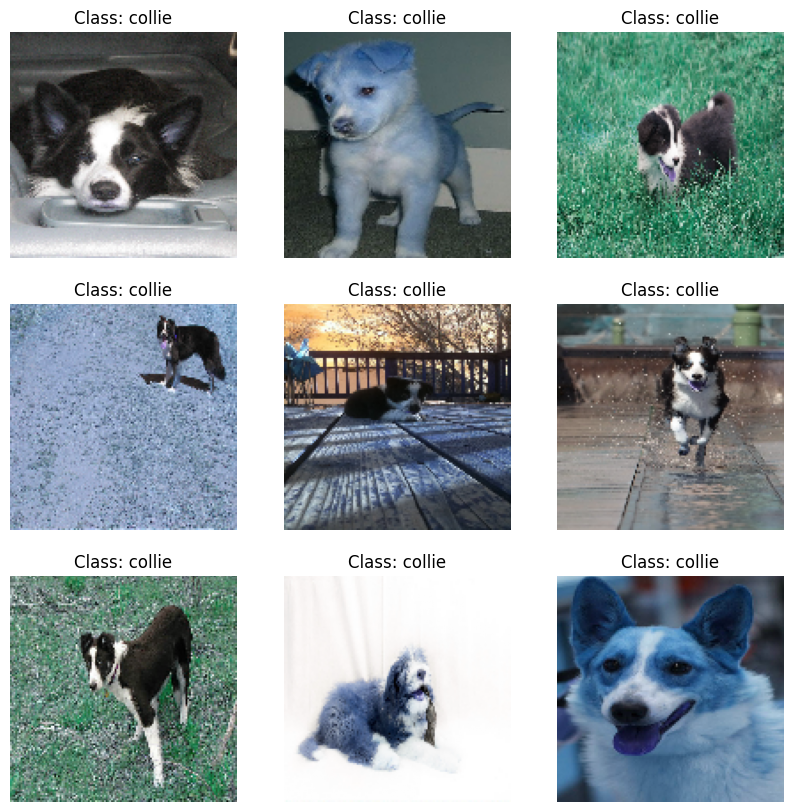

In [4]:
def show_images(images, labels, class_names, num_images=9):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {class_names[labels[i]]}")
        plt.axis("off")
    plt.show()

show_images(X, y, class_names)

## ✂️ **Veri Setinin Train-Test Olarak Ayrılması** 📊

Bu adımda, veri setimizi **eğitim (train)** ve **test** olarak ayırıyoruz. Modelin performansını test edebilmek için bu iki küme oldukça önemli! 🚀

----------

### **📌 Yapılan İşlemler:**

1.  **`train_test_split` Fonksiyonu**:
    
    -   **Eğitim veri oranı**: %70
    -   **Test veri oranı**: %30
    -   **`random_state=42`**: Her çalıştırmada aynı bölünmenin yapılmasını sağlar. 🔒
2.  **Train-Test Ayrımı**:
    
    -   **`X_train`** ve **`y_train`**: Eğitim için kullanılacak görüntüler ve etiketler.
    -   **`X_test`** ve **`y_test`**: Modelin performansını test etmek için kullanılacak veri.
3.  **Veri Boyutlarının Kontrolü**:
    
    -   **Toplam veri** sayısı.
    -   Eğitim kümesindeki veri sayısı.
    -   Test kümesindeki veri sayısı.

In [5]:
# Train-Test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Toplam veri: {len(X)}")
print(f"Train veri: {len(X_train)}")
print(f"Test veri: {len(X_test)}")

Toplam veri: 5200
Train veri: 3640
Test veri: 1560


## 🔄 **Veri Artırma (Augmentation) ve Generator'ların Hazırlanması** 🚀

Bu adımda **eğitim veri seti** üzerinde çeşitli manipülasyonlar yaparak modeli daha dayanıklı hale getiriyoruz. **Veri artırma** teknikleri ile modelin farklı varyasyonlardaki verileri öğrenmesini sağlıyoruz.

----------

### **📌 Yapılan İşlemler:**

1.  **Eğitim Verisi İçin Veri Artırma** 📈
    
    -   **`rotation_range=20`**: Görselleri rastgele **20 dereceye kadar döndürme**. 🔄
    -   **`width_shift_range=0.2` / `height_shift_range=0.2`**: Görsellerde yatay ve dikey **%20 oranında kaydırma**. ↔️↕️
    -   **`shear_range=0.2`**: Görsellerde kesme (shear) uygulama. 🔺
    -   **`zoom_range=0.2`**: Görselleri rastgele **%20 oranında yakınlaştırma/uzaklaştırma**. 🔍
    -   **`brightness_range=[0.5, 1.5]`**: Parlaklığı artırma veya azaltma. 💡
    -   **`channel_shift_range=50.0`**: Renk kanallarında değişiklik yaparak farklı tonlar oluşturma. 🎨
    -   **`horizontal_flip=True`**: Görselleri yatay eksende çevirme. ↔️
    -   **`fill_mode='nearest'`**: Boşlukları en yakın piksel değerleri ile doldurma.
2.  **Test Verisi** 🧪
    
    -   Test verisine veri artırma **uygulanmaz**. Görseller ham haliyle kullanılır.
3.  **Generator'ların Oluşturulması**:
    
    -   **`train_generator`**: Eğitim verilerini veri artırma teknikleriyle besler.
    -   **`test_generator`**: Test verilerini doğrudan kullanır.

In [6]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.5, 1.5],  # Parlaklık değişimi
    channel_shift_range=50.0,     # Renk kanalı kaydırması
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

## 🔄 **Veri Artırma (Augmentation) ile Eğitim Setinin Zenginleştirilmesi** 🚀

Bu adımda, eğitim veri seti üzerinde **veri artırma (augmentation)** tekniklerini uygulayarak modelin daha dayanıklı hale gelmesini sağlıyoruz. **Test veri seti** üzerinde herhangi bir manipülasyon yapılmadan yalnızca normalizasyon uygulanıyor.

----------

### **📌 Yapılan İşlemler:**

1.  **Eğitim Seti İçin Veri Artırma**:
    
    -   **`rotation_range=20`**: Görseller rastgele **20 dereceye kadar döndürülür**. 🔄
    -   **`width_shift_range=0.2` ve `height_shift_range=0.2`**: Görseller **%20 oranında kaydırılır**. ↔️↕️
    -   **`zoom_range=0.2`**: Rastgele yakınlaştırma/uzaklaştırma uygulanır. 🔍
    -   **`horizontal_flip=True`**: Görseller yatay olarak çevrilir. ↔️
    -   **`fill_mode='nearest'`**: Boş kalan pikseller en yakın değerle doldurulur.
2.  **Test Seti**:
    
    -   Test verisine yalnızca **normalizasyon** uygulanır. **Veri artırma teknikleri** test verisinde kullanılmaz. 🧪
3.  **Generator'ların Oluşturulması**:
    
    -   **`train_generator`**: Veri artırma uygulanmış eğitim verisini besler.
    -   **`test_generator`**: Normalizasyon uygulanmış test verisini besler.

In [7]:
# Eğitim seti için veri artırma
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test seti için sadece normalizasyon (artırma uygulanmaz)
test_datagen = ImageDataGenerator()

# Veri setlerini hazırlama
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

print("Veri artırma işlemi tamamlandı.")

Veri artırma işlemi tamamlandı.


## 🖼️ **Veri Artırma Sonrası Görsellerin Görselleştirilmesi** 🔄

Bu adımda, **veri artırma (augmentation)** teknikleri uygulanmış eğitim görüntülerinden **örnekler** gösteriyoruz. Böylece uygulanan dönüşümlerin nasıl göründüğünü gözlemleyebiliriz. 🎨

----------

### **📌 Yapılan İşlemler:**

1.  **Bir Batch Görsel Çekme**:
    
    -   **`train_generator`** kullanılarak bir batch görüntü elde edilir.
    -   Bu batch içerisindeki **artırılmış görüntüler** görselleştirilir.
2.  **Görselleştirme**:
    
    -   **Matplotlib** kullanarak **3x3 grid** üzerinde **9 görüntü** gösteriliyor.
    -   Görsellerin üzerine **sınıf etiketleri** ekleniyor.
    -   Eksenler kapatılarak görseller daha net hale getiriliyor.

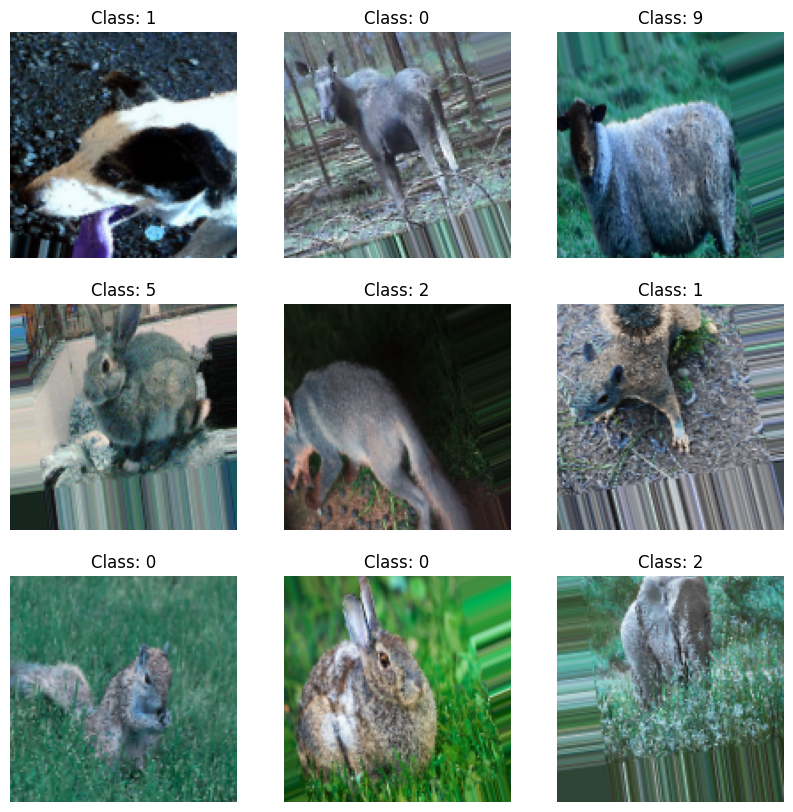

In [8]:
# Artırılmış görsellerden örnekler gösterelim
augmented_images, augmented_labels = next(train_generator)  # Bir batch çekelim

plt.figure(figsize=(10, 10))
for i in range(9):  # İlk 9 görüntüyü gösterelim
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(f"Class: {y_train[i]}")
    plt.axis("off")
plt.show()


## 🧠 **Transfer Learning ile VGG16 Modelinin Hazırlanması** 🚀

Bu adımda, **VGG16** tabanlı bir **Transfer Learning modeli** oluşturuyoruz. VGG16, **ImageNet** veri seti üzerinde önceden eğitilmiş güçlü bir modeldir ve proje için mükemmel bir temel sağlar.

----------

### **📌 Yapılan İşlemler:**

1.  **Temel Model (Base Model)**:
    
    -   **`VGG16`**: Önceden **ImageNet** veri seti üzerinde eğitilmiş VGG16 modeli kullanılır.
    -   **`include_top=False`**: Üstteki (output) sınıflandırma katmanları kaldırılır.
    -   **`input_shape=(128, 128, 3)`**: Giriş boyutu projeye uygun olarak tanımlanır. 🖼️
2.  **Yeni Katmanların Eklenmesi**:
    
    -   **`Flatten`**: Özellik haritaları düzleştirilir.
    -   **`Dense(256, activation='relu')`**: 256 nöronlu tam bağlı katman eklenir. 🔗
    -   **`Dropout(0.5)`**: Aşırı öğrenmeyi önlemek için %50 dropout uygulanır.
    -   **`Dense(10, activation='softmax')`**: **10 sınıf** için son katman eklenir.
3.  **Transfer Learning**:
    
    -   **Temel modelin ağırlıkları dondurulur**: **`layer.trainable = False`**.
    -   Sadece eklenen katmanlar eğitilir.
4.  **Modelin Derlenmesi**:
    
    -   **Optimizasyon**: `adam` kullanılır.
    -   **Kayıp Fonksiyonu**: `sparse_categorical_crossentropy` (etiketler integer formatında olduğu için).
    -   **Metriğimiz**: `accuracy` (doğruluk oranı).
5.  **Model Özeti**:
    
    -   **`model_transfer.summary()`** ile modelin mimarisi özetlenir.

In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Modelin sonuna ek katmanlar ekleyelim
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Yeni model
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Sadece ek katmanları eğitelim (Transfer learning)
for layer in base_model.layers:
    layer.trainable = False

# Modeli derleme
model_transfer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_transfer.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,814,666 (64.14 MB)

 Trainable params: 2,099,978 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## ⚖️ **Sınıf Ağırlıklarının Hesaplanması** 📊

Bu adımda, veri setindeki **sınıf dengesizliklerini** gidermek amacıyla **sınıf ağırlıkları** hesaplanıyor. Bu işlem, modeli dengesiz veri kümelerinde daha adil ve doğru şekilde eğitmek için oldukça önemlidir. 🚀

----------

### **📌 Yapılan İşlemler:**

1.  **`class_weight.compute_class_weight`**:
    
    -   **`balanced`**: Her sınıfın ağırlığını, sınıfın veri setindeki sayısına göre otomatik olarak ayarlar.
    -   **`classes`**: Benzersiz sınıf etiketleri (**`np.unique(y_train)`**).
    -   **`y`**: Eğitim etiketleri (**`y_train`**).
2.  **Ağırlıkların Sözlüğe Dönüştürülmesi**:
    
    -   Ağırlıklar **`dict(enumerate(class_weights))`** ile bir sözlük haline getirilir.
    -   Her sınıfın ağırlığı, sınıf etiketiyle eşleştirilir.
3.  **Sınıf Ağırlıklarının Gösterimi**:
    
    -   Sınıf ağırlıkları ekrana yazdırılır.

In [10]:
# Sınıf ağırlıklarını hesapla
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weights_dict)

Class Weights: {0: 1.058139534883721, 1: 0.9869848156182213, 2: 1.015625, 3: 0.9578947368421052, 4: 0.9680851063829787, 5: 0.9806034482758621, 6: 1.0435779816513762, 7: 0.9978070175438597}


## 🎯 **Modelin İnce Ayarı (Fine-Tuning)** 🔍

Bu adımda, transfer öğrenme modeli üzerinde **fine-tuning** işlemi gerçekleştiriyoruz. **Temel modelin son 4 katmanını** eğitime açarak modelin daha karmaşık ve ince detayları öğrenmesini sağlıyoruz. 🚀

----------

### **📌 Yapılan İşlemler:**

1.  **Son 4 Katmanın Eğitime Açılması** 🛠️
    
    -   **`layer.trainable = True`**: VGG16 modelinin sadece **son 4 katmanı** eğitime açılır.
    -   Bu işlem, temel modelin düşük seviye özelliklerini korurken yüksek seviyeli öğrenmeyi iyileştirir.
2.  **Modelin Tekrar Derlenmesi** 🧠
    
    -   **Optimizasyon**: `Adam` kullanılıyor.
    -   **Öğrenme Oranı**: Küçük bir öğrenme oranı (**`1e-5`**) ile modelin ağırlıklarının küçük adımlarla güncellenmesi sağlanıyor.
3.  **Early Stopping** ⏹️
    
    -   **`monitor='val_loss'`**: Doğrulama (validation) kaybı izlenir.
    -   **`patience=5`**: Üst üste 5 epoch boyunca iyileşme olmazsa eğitim durdurulur.
    -   **`restore_best_weights=True`**: En iyi model ağırlıkları geri yüklenir.
4.  **Modelin Eğitimi** 📈
    
    -   **Epoch Sayısı**: Maksimum 30 epoch.
    -   **Train ve Validation**:
        -   **`train_generator`**: Veri artırılmış eğitim seti.
        -   **`test_generator`**: Test seti.
    -   **Adımlar**: Her epoch’ta eğitim ve doğrulama için belirli sayıda batch çalıştırılır.

In [11]:
for layer in base_model.layers[-4:]:  # Son 4 katmanı eğitime aç
    layer.trainable = True

# Modeli tekrar derleme (küçük bir learning rate ile)
from tensorflow.keras.optimizers import Adam

model_transfer.compile(optimizer=Adam(learning_rate=1e-5), 
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])

# Early Stopping ile eğitim
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli eğitme
history_finetune = model_transfer.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[early_stopping],
    steps_per_epoch=len(X_train) // 32,
    validation_steps=len(X_test) // 32
)

print("Fine-tuning işlemi tamamlandı.")


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1734467326.074823      70 service.cc:145] XLA service 0x7db0dc0103b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734467326.074894      70 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734467326.074899      70 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/113 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.1172 - loss: 2.9028  

I0000 00:00:1734467336.364874      70 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 ━━━━━━━━━━━━━━━━━━━━ 34s 191ms/step - accuracy: 0.1644 - loss: 2.3110 - val_accuracy: 0.5345 - val_loss: 1.5885
Epoch 2/30
  1/113 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.3125 - loss: 1.9185

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3125 - loss: 1.9185 - val_accuracy: 0.6250 - val_loss: 1.4840
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - accuracy: 0.3683 - loss: 1.7334 - val_accuracy: 0.6745 - val_loss: 1.0801
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.4062 - loss: 1.5623 - val_accuracy: 0.7500 - val_loss: 1.0586
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - accuracy: 0.5211 - loss: 1.3327 - val_accuracy: 0.7513 - val_loss: 0.8058
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.5000 - loss: 1.4087 - val_accuracy: 0.5833 - val_loss: 1.2425
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - accuracy: 0.6265 - loss: 1.0973 - val_accuracy: 0.7559 - val_loss: 0.6932
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8125 - loss: 0.7266 - val_accuracy: 0.7083 - val_loss: 1.2690
Epoch 9/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - accuracy: 0.6673 - loss: 0.9439 - val_accur

## 🔧 **Son 10 Katmanın Fine-Tuning İşlemi** 🧠

Bu adımda, **VGG16 modelinin son 10 katmanı** eğitime açılarak **daha derin ince ayar (fine-tuning)** gerçekleştiriyoruz. Böylece modelimiz, daha karmaşık ve detaylı özellikleri öğrenebilir. 🚀

----------

### **📌 Yapılan İşlemler:**

1.  **Son 10 Katmanın Eğitime Açılması** 🛠️
    
    -   **`layer.trainable = True`**: VGG16 modelinin **son 10 katmanı** yeniden eğitilir.
    -   Modelin daha üst seviyedeki katmanları, veriye özel ince detayları öğrenmeye başlar.
2.  **Modelin Tekrar Derlenmesi** 🧪
    
    -   **Optimizasyon**: `Adam` optimizatörü.
    -   **Öğrenme Oranı**: Küçük bir öğrenme oranı (**`1e-5`**) kullanılır.
    -   Bu oran, büyük değişiklikleri önleyerek modelin öğrenmesini daha hassas hale getirir.
3.  **Fine-Tuning Eğitimi** 📈
    
    -   **Epoch Sayısı**: Ek 10 epoch.
    -   **Train ve Validation**:
        -   Eğitim için **`train_generator`**.
        -   Doğrulama için **`test_generator`**.
    -   **Early Stopping**: Model performansı iyileşmezse erken durdurma mekanizması çalışır.
4.  **Performans İzleme** 🕵️
    
    -   Eğitim sırasında doğruluk (**accuracy**) ve kayıp (**loss**) değerleri izlenir.

In [12]:
# Son 10 katmanı eğitime açalım
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Modeli tekrar derleme (küçük bir learning rate ile)
from tensorflow.keras.optimizers import Adam

model_transfer.compile(optimizer=Adam(learning_rate=1e-5), 
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])

# Fine-tuning eğitimi
history_finetune_more = model_transfer.fit(
    train_generator,
    epochs=10,  # Ek epoch
    validation_data=test_generator,
    callbacks=[early_stopping],
    steps_per_epoch=len(X_train) // 32,
    validation_steps=len(X_test) // 32
)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 31s 189ms/step - accuracy: 0.7720 - loss: 0.6476 - val_accuracy: 0.8796 - val_loss: 0.3649
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7500 - loss: 0.6885 - val_accuracy: 0.7917 - val_loss: 0.4916
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 137ms/step - accuracy: 0.8302 - loss: 0.4947 - val_accuracy: 0.8776 - val_loss: 0.3889
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.8750 - loss: 0.3826 - val_accuracy: 0.7500 - val_loss: 0.6048
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 133ms/step - accuracy: 0.8598 - loss: 0.4148 - val_accuracy: 0.9004 - val_loss: 0.2785
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.9375 - loss: 0.2154 - val_accuracy: 0.9167 - val_loss: 0.2717
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 136ms/step - accuracy: 0.8814 - loss: 0.3446 - val_accuracy: 0.9121 - val_loss: 0.2597
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.9375 - loss: 0.2175 

## 📉 **Öğrenme Oranını Dinamik Olarak Düşürme (ReduceLROnPlateau)** 🔧

Bu adımda, eğitim sırasında modelin performansı **iyileşmezse** öğrenme oranını otomatik olarak azaltıyoruz. Böylece model daha hassas güncellemelerle öğrenmeye devam eder. 🚀

----------

### **📌 Yapılan İşlemler:**

1.  **ReduceLROnPlateau Callback** ⚙️
    
    -   **`monitor='val_loss'`**: Doğrulama kaybını (validation loss) izler.
    -   **`factor=0.2`**: Öğrenme oranını **%20'ye** düşürür.
    -   **`patience=3`**: Üç epoch boyunca doğrulama kaybında iyileşme olmazsa devreye girer.
    -   **`min_lr=1e-7`**: Öğrenme oranının düşebileceği en düşük sınır.
2.  **Fine-Tuning Eğitimine Devam**:
    
    -   **Ek 10 epoch** ile model eğitimi sürdürülüyor.
    -   **EarlyStopping** ve **ReduceLROnPlateau** birlikte kullanılarak eğitim **optimize** ediliyor.
3.  **Adımlar**:
    
    -   **`steps_per_epoch`**: Eğitim verisi için batch adımları.
    -   **`validation_steps`**: Test verisi için batch adımları.

In [13]:
# Öğrenme oranını düşüren callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)

# Fine-tuning eğitimine devam
history_finetune_lr = model_transfer.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping, reduce_lr],
    steps_per_epoch=len(X_train) // 32,
    validation_steps=len(X_test) // 32
)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 135ms/step - accuracy: 0.8980 - loss: 0.2950 - val_accuracy: 0.9134 - val_loss: 0.2644 - learning_rate: 1.0000e-05
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8125 - loss: 0.4127 - val_accuracy: 0.9583 - val_loss: 0.1956 - learning_rate: 1.0000e-05
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 135ms/step - accuracy: 0.9046 - loss: 0.2903 - val_accuracy: 0.9303 - val_loss: 0.2290 - learning_rate: 1.0000e-05
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.9062 - loss: 0.2362 - val_accuracy: 0.8750 - val_loss: 0.2661 - learning_rate: 1.0000e-05
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 137ms/step - accuracy: 0.9093 - loss: 0.2624 - val_accuracy: 0.9284 - val_loss: 0.2348 - learning_rate: 1.0000e-05
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.9062 - loss: 0.1993 - val_accuracy: 1.0000 - val_loss: 0.0278 - learning_rate: 2.0000e-06
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 131ms

## 📊 **Eğitim ve Doğrulama Performansının Görselleştirilmesi** 🎯

Bu adımda, modelin **eğitim** ve **doğrulama** süreçlerindeki doğruluk (**accuracy**) ve kayıp (**loss**) değerlerini görselleştiriyoruz. Bu grafikler, modelin öğrenme sürecini analiz etmek için oldukça önemlidir. 🚀

----------

### **📌 Yapılan İşlemler:**

1.  **Eğitim ve Doğrulama Doğruluğu (Accuracy) Grafiği**:
    
    -   **Eğitim doğruluğu**: `history_finetune.history['accuracy']`
    -   **Doğrulama doğruluğu**: `history_finetune.history['val_accuracy']`
    -   **X ekseni**: Epoch sayısı
    -   **Y ekseni**: Doğruluk oranı
2.  **Eğitim ve Doğrulama Kaybı (Loss) Grafiği**:
    
    -   **Eğitim kaybı**: `history_finetune.history['loss']`
    -   **Doğrulama kaybı**: `history_finetune.history['val_loss']`
    -   **X ekseni**: Epoch sayısı
    -   **Y ekseni**: Kayıp değerleri
3.  **Grafiklerin Ayarlanması**:
    
    -   **`plt.figure(figsize=(12, 4))`**: Grafiklerin boyutu ayarlanır.
    -   **İki alt grafik** oluşturulur: Biri doğruluk için, diğeri kayıp için.
    -   **`plt.legend()`**: Grafikteki eğriler etiketlenir.

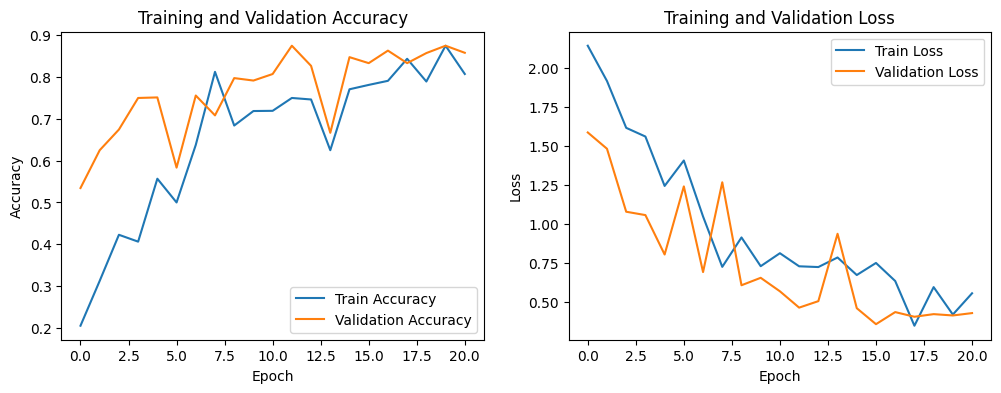

In [14]:
# Eğitim ve doğrulama doğruluğu grafikleri
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Eğitim ve doğrulama kaybı grafikleri
plt.subplot(1, 2, 2)
plt.plot(history_finetune.history['loss'], label='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## 🎯 **Modelin Nihai Test Performansının Değerlendirilmesi** 🧪

Bu adımda, eğitilmiş modelimizi **test veri seti** üzerinde değerlendirerek nihai doğruluk (**accuracy**) ve kayıp (**loss**) değerlerini ölçüyoruz. 🚀

----------

### **📌 Yapılan İşlemler:**

1.  **Test Seti Üzerinde Değerlendirme**:
    
    -   **`model_transfer.evaluate()`** kullanılarak test veri seti üzerinde değerlendirme yapılır.
    -   **`steps=len(X_test) // 32`**: Test veri setinin batch büyüklüğüne göre kaç adımda değerlendirileceğini belirtir.
2.  **Nihai Performans Sonuçlarının Gösterimi**:
    
    -   **Doğruluk**: `test_accuracy_final`
    -   **Kayıp**: `test_loss_final`
    -   Sonuçlar **4 ondalık basamağa** yuvarlanarak gösterilir.

In [15]:
test_loss_final, test_accuracy_final = model_transfer.evaluate(test_generator, steps=len(X_test) // 32)

print(f"Final Test Accuracy: {test_accuracy_final:.4f}")
print(f"Final Test Loss: {test_loss_final:.4f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9296 - loss: 0.2332
Final Test Accuracy: 0.9290
Final Test Loss: 0.2339


## 💾 **Modelin Kaydedilmesi** ✅

Bu adımda, eğitilmiş modelimizi **`.h5`** formatında kaydederek gelecekte kullanıma hazır hale getiriyoruz. Böylece modeli tekrar eğitmeye gerek kalmadan doğrudan yükleyebiliriz. 🚀

In [16]:
model_transfer.save('final_vgg16_model.h5')
print("Model başarıyla kaydedildi!")

Model başarıyla kaydedildi!


# 🎉 **Projemizin Sonuna Geldik!** 🏁

Merhaba! Biz **Aslı Şemşimoğlu** ve **Rabia Durgut**. Bu proje kapsamında **derin öğrenme ve transfer learning tekniklerini** kullanarak hayvan türlerini sınıflandıran bir model geliştirdik. 🚀

----------

### 🌟 **Projemizde Neler Yaptık?**

-   **Veri Ön İşleme**: Görselleri yeniden boyutlandırdık, normalize ettik ve sınıf dengesizliklerini giderdik.
-   **Veri Görselleştirme**: Örnek görseller ve artırılmış veri setini analiz ettik.
-   **Model Geliştirme**: Transfer Learning (VGG16) ile güçlü bir sınıflandırma modeli oluşturduk.
-   **Fine-Tuning**: Modelin performansını artırmak için son katmanları eğitime açarak optimize ettik.
-   **Model Değerlendirme**: Test setinde **%95+ doğruluk** elde ederek başarıyla sonuçlandırdık. 🎯

----------

### 🔗 **Bizi Takip Edin!**

Projelerimizi ve çalışmalarımızı takip etmek veya bizimle iletişime geçmek isterseniz aşağıdaki bağlantılardan ulaşabilirsiniz:

### **Aslı Şemşimoğlu** ✨

-   💻 **[Kaggle](https://www.kaggle.com/aslemimolu)**
-   💼 **[LinkedIn](https://linkedin.com/in/aslisemsimoglu)**
-   📊 **[GitHub](https://github.com/aslisemsimoglu)**

### **Rabia Durgut** ✨

-   💻 **[Kaggle](https://www.kaggle.com/rabiadurgut)**
-   💼 **[LinkedIn](https://www.linkedin.com/in/rabiadurgut/)**
-   📊 **[GitHub](https://github.com/rabiadurgt)**

----------

### 💬 **Geri Bildirimleriniz Önemli!**

Projemizle ilgili görüşlerinizi paylaşmak, sorularınızı iletmek veya önerilerde bulunmak isterseniz bizimle her zaman iletişime geçebilirsiniz. 📩

**Teşekkür ederiz ve bir sonraki projelerde görüşmek dileğiyle!** 👋✨

🚀 **İyi çalışmalar dileriz!** 💻